In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
movies = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Association rule\\my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
movies.shape

(10, 15)

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [9]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
movies['V1'].unique()

array(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1'], dtype=object)

In [16]:
movies['V2'].unique()

array(['LOTR1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR'], dtype=object)

In [17]:
movies['V3'].unique()

array(['Harry Potter1', 'Braveheart', nan, 'Sixth Sense', 'Gladiator'],
      dtype=object)

In [18]:
movies['V4'].unique()

array(['Green Mile', nan], dtype=object)

In [19]:
movies['V5'].unique()

array(['LOTR2', nan], dtype=object)

# Pre-Processing

In [20]:
df = pd.get_dummies(movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [21]:
df.shape

(10, 25)

# Apriori Algorithm

In [25]:
frequent_itemsets = apriori(df, min_support= 0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V3_Harry Potter1, Sixth Sense, LOTR1, V1_Sixt..."
1393,0.1,"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ..."
1394,0.1,"(LOTR2, V3_Harry Potter1, Sixth Sense, V1_Sixt..."
1395,0.1,"(LOTR2, V3_Harry Potter1, LOTR1, V1_Sixth Sens..."


# Taking metric as 'support'

In [28]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [29]:
rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
43,"(V1_Gladiator, V2_Patriot)","(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,(V2_Patriot),"(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
45,"(V2_Patriot, Patriot)","(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [30]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

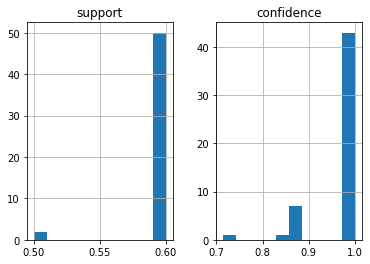

In [31]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

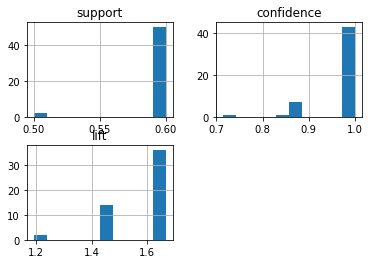

In [33]:
rules[['support','confidence','lift']].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


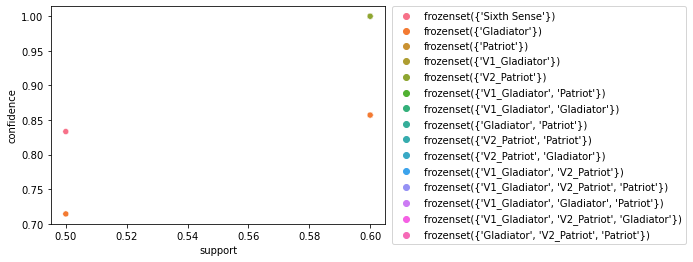

In [34]:
sns.scatterplot('support', 'confidence', data = rules , hue = 'antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()

# Taking metric as 'confidence'

In [42]:
rules1 = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(V2_LOTR1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63234,(V5_LOTR2),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63235,(V4_Green Mile),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(Harry Potter1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [43]:
rules1.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31619,"(LOTR1, V1_Sixth Sense, Sixth Sense, V4_Green ...","(LOTR2, V2_LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33385,"(LOTR1, Sixth Sense, V4_Green Mile)","(Green Mile, V1_Sixth Sense, Harry Potter1, V5...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33363,"(V1_Sixth Sense, Harry Potter1, Sixth Sense, G...","(LOTR1, V5_LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33364,"(V4_Green Mile, Harry Potter1, Sixth Sense, V5...","(LOTR1, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33365,"(V4_Green Mile, Sixth Sense, V5_LOTR2, Green M...","(LOTR1, V1_Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33366,"(Green Mile, Harry Potter1, Sixth Sense, V5_LO...","(LOTR1, V1_Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33367,"(V4_Green Mile, Harry Potter1, Sixth Sense, Gr...","(LOTR1, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33368,"(LOTR1, V1_Sixth Sense, V5_LOTR2, V4_Green Mile)","(Harry Potter1, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
52404,"(Sixth Sense, LOTR2, V2_LOTR1, V3_Harry Potter1)","(LOTR1, V1_Sixth Sense, V5_LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33370,"(LOTR1, V1_Sixth Sense, V5_LOTR2, Green Mile)","(V4_Green Mile, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [44]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
63233,(V2_LOTR1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63234,(V5_LOTR2),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63235,(V4_Green Mile),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(Harry Potter1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

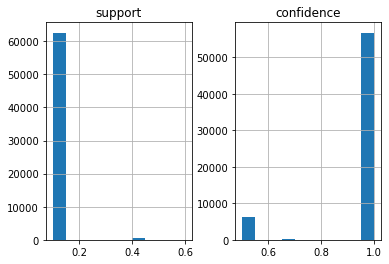

In [45]:
rules1[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

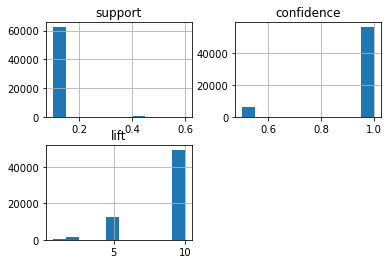

In [46]:
rules1[['support','confidence','lift']].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


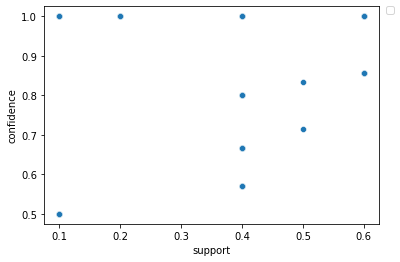

In [48]:
sns.scatterplot('support', 'confidence', data = rules1 )
plt.legend(bbox_to_anchor=(1.02, 1), loc = 'upper left', borderaxespad=0)
plt.show()

# Taking metric as 'lift'

In [54]:
rules3 = association_rules(frequent_itemsets , metric='lift', min_threshold=0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V5_LOTR2),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V4_Green Mile),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [56]:
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR1, LOTR2, Harry Potter1, V5_LOTR2)","(Sixth Sense, V3_Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(V2_LOTR1, Harry Potter1, V5_LOTR2)","(LOTR1, LOTR2, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(V4_Green Mile, LOTR2, V2_LOTR1)","(LOTR1, Harry Potter1, Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(LOTR2, V2_LOTR1, Harry Potter1)","(LOTR1, Sixth Sense, V5_LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(V4_Green Mile, LOTR2, V5_LOTR2)","(LOTR1, V2_LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
45,(Gladiator),(V1_Sixth Sense),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
669,(Gladiator),"(V1_Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
664,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
214,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [57]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V5_LOTR2),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V4_Green Mile),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64250,(Harry Potter1),"(LOTR2, V3_Harry Potter1, Sixth Sense, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

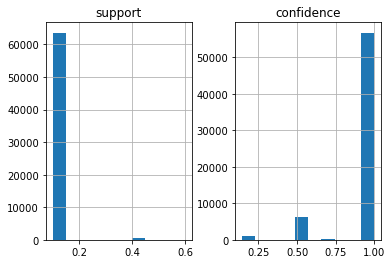

In [58]:
rules3[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

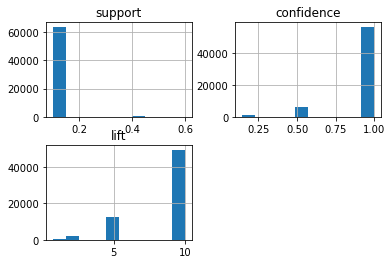

In [59]:
rules3[['support','confidence','lift']].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


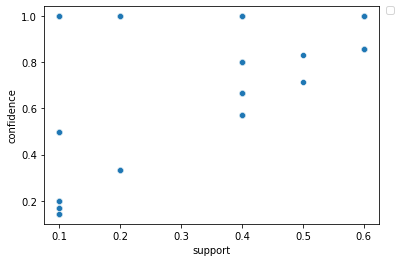

In [60]:
sns.scatterplot('support', 'confidence', data = rules3)
plt.legend(bbox_to_anchor=(1.02, 1),loc = 'upper left', borderaxespad=0)
plt.show()